In [1]:
!python3 pose_extractor.py --src panoptic_sample.mp4 --dst result.csv

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from pose_extractor import mp_dict
from pose_extractor import get_tree_connections
from pose_extractor import get_tree_reversed_mp_dict

In [4]:
landmarks = pd.read_csv('result.csv', index_col='time')
landmarks.head()

,left_thumb,right_index,left_ear,right_wrist,left_knee,left_shoulder,right_heel,left_foot_index,right_ear,left_pinky,...,left_ankle,backbone_end,right_ankle,right_elbow,left_hip,nose,left_eye_outer,right_shoulder,left_heel,left_wrist
time,,,,,,,,,,,,,,,,,,,,,
0:0000,"(1.9249681593108332, 1.9520618697601042)","(2.565973331776095, 1.4751466803450848)","(0.08442607885028959, 0.9564994467962097)","(2.1175638423913927, 1.5993129456233703)","(1.8278809249116277, 1.5952130154556903)","(1.4426651374918156, -0.010775097815839463)","(0.7810656847132768, 1.5537527265776103)","(2.498263150619813, 1.5799955216391808)","(0.09928450484510319, 2.366334683006106)","(2.1683073776001462, 1.5466153587107085)",...,"(0.5655235704918249, 1.5381992398100055)","(1.2911139397388063, 1.580885813943197)","(0.578888155968207, 1.6354279067812867)","(1.2664798899501788, 1.7087283764449819)","(1.359218533999818, 0.03543060478979036)","(2.68457262080647, -1.5354847144336403)","(1.6053117421867964, 0.03480071425594697)","(1.6989275160979778, 3.1308175557739535)","(0.8334001396501928, 1.654793899856527)","(2.145354838708694, 1.5956794821950966)"
0:0002,"(1.9575652753777908, 1.9448644507369466)","(2.578266925039766, 1.4727969234791036)","(0.08432110343491879, 0.9449056805641688)","(2.175523498284804, 1.5944140691400244)","(1.8412809725598103, 1.5953683881596294)","(1.513452939884318, -0.016288432301128024)","(0.8013245173076309, 1.5310599486468002)","(2.487287726457379, 1.5809490795184238)","(0.09399362923732064, 2.3348634988771653)","(2.263623552110785, 1.5427596938981818)",...,"(0.6242464735659233, 1.5402995662820096)","(1.3063093075024186, 1.5801635528698585)","(0.6039594068002777, 1.602729295298372)","(1.3214501905240816, 1.706596571555881)","(1.5360398440852276, -0.003854538217692424)","(2.6777155076629167, -1.5394891726733568)","(1.6011200554848686, 0.02164560772321238)","(1.6281397137054754, 3.125304221288665)","(0.8778899065768925, 1.6386712925633296)","(2.212154057631835, 1.5989250287272756)"
0:0004,"(1.9875406666296476, 1.9339963630541521)","(2.5873595076324447, 1.4775480029576795)","(0.07852041280018413, 0.8993940118928585)","(2.2145678266617357, 1.586882919245248)","(1.8443404259498253, 1.5949884349471855)","(1.60041338195005, -0.027177808631110204)","(0.6555170832799797, 1.4831097655072263)","(2.4096809411993627, 1.6159114646544417)","(0.08055884485654934, 2.25822886901991)","(2.3028982421321973, 1.539760551876157)",...,"(0.5749422704618771, 1.5445509635270704)","(1.2956978632452232, 1.5781158153333439)","(0.5149821251712794, 1.5470329528009352)","(1.3258995747272877, 1.7011742810241166)","(1.7096793943462352, -0.03337075257531189)","(2.6845610455917113, -1.5504458919065258)","(1.6065381900910005, -0.060368306762639)","(1.5411792716397434, 3.114414844958683)","(0.7459389670340232, 1.607980209560295)","(2.235231456625178, 1.6056285593783512)"
0:0006,"(1.9725836624832906, 1.9035449843001004)","(2.6034209155172765, 1.4871487198756477)","(0.07997202498907673, 0.944801594223816)","(2.2398925689281097, 1.579352226131192)","(1.8420802449637783, 1.5944104634844136)","(1.66321197848771, -0.03653793452534733)","(0.6475529929774334, 1.4697109622516513)","(2.398845661971444, 1.623264326432323)","(0.08063930624859213, 2.2263312943296563)","(2.2817657454106652, 1.5354619789657458)",...,"(0.5597071887172539, 1.5454426725715997)","(1.3553713854065894, 1.5730168408763823)","(0.5373509761989351, 1.5224915204971208)","(1.3423492349548662, 1.6913858912271456)","(1.7483327054343758, -0.059388278204863816)","(2.6691200331599747, -1.5546474381360593)","(1.6070029113627842, -0.008339249497500653)","(1.4783806751020834, 3.1050547190644457)","(0.7109934822975573, 1.5688648816685584)","(2.2185356404496637, 1.609492344898584)"
0:0008,"(1.9874422289853, 1.8694234539951444)","(2.5819254372554115, 1.5028553738025563)","(0.0805445128424741, 1.0590024499741446)","(2.2610081604812162, 1.564291517342775)","(1.8404675963390094, 1.5923204804705506)","(1.6151600082304725, -0.03917446594

Зададим длины костей в скелете

In [5]:
bones_len = {
    'nose': 0.1,
    'left_eye_inner': 0.005,
    'left_eye': 0.005,
    'left_eye_outer': 0.005,
    'right_eye_inner': 0.005,
    'right_eye': 0.005,
    'right_eye_outer': 0.005,
    'left_ear': 0.005,
    'right_ear': 0.005,
    'left_shoulder': 0.1,
    'right_shoulder': 0.1,
    'left_elbow': 0.2,
    'right_elbow': 0.2,
    'left_wrist': 0.2,
    'right_wrist': 0.2,
    'left_pinky': 0.05,
    'right_pinky': 0.05,
    'left_index': 0.05,
    'right_index': 0.05,
    'left_thumb': 0.05,
    'right_thumb': 0.05,
    'left_hip': 0.1,
    'right_hip': 0.1,
    'left_knee': 0.2,
    'right_knee': 0.2,
    'left_ankle': 0.2,
    'right_ankle': 0.2,
    'left_heel': 0.05,
    'right_heel': 0.05,
    'left_foot_index': 0.05,
    'right_foot_index': 0.05,
    'backbone_end': 0.4
}

In [6]:
def get_coordinate(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def calculate_coordinates(angular_coordinates, coordinates, bone_start_index = 33):
    connections = get_tree_connections()
    reversed_mp_dict = get_tree_reversed_mp_dict()
    
    children = [c[1] for c in connections if c[0] == bone_start_index]
    
    for c in children:
        assert coordinates[c] == (0, 0, 0)
        bone_name = reversed_mp_dict[c]        
        x, y, z = get_coordinate(bones_len[bone_name], *map(float, angular_coordinates[bone_name][1:-1].split(', ')))
        coordinates[c] = (coordinates[bone_start_index][0] + x, coordinates[bone_start_index][1] + y, coordinates[bone_start_index][2] + z)
        coordinates = calculate_coordinates(angular_coordinates, coordinates, c)
        
    return coordinates

In [7]:
def draw_frame(landmarks_df, frame_ind):
    coordinates = calculate_coordinates(landmarks_df.iloc[frame_ind], coordinates = [(0, 0, 0)] * 35)
    
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.view_init(elev=10, azim=10)
    
    connections = get_tree_connections()
    for connection in connections:
        ax.plot3D([coordinates[connection[0]][2]] + [coordinates[connection[1]][2]],
                [coordinates[connection[0]][0]] + [coordinates[connection[1]][0]],
                [-coordinates[connection[0]][1]] + [-coordinates[connection[1]][1]])

Нарисуем некоторые фреймы

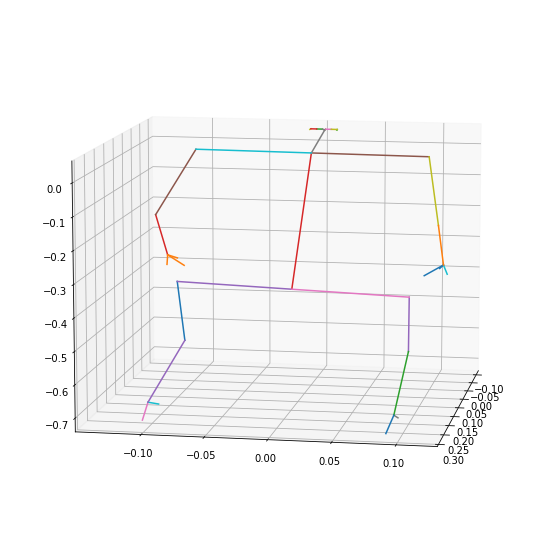

In [8]:
draw_frame(landmarks, 0)

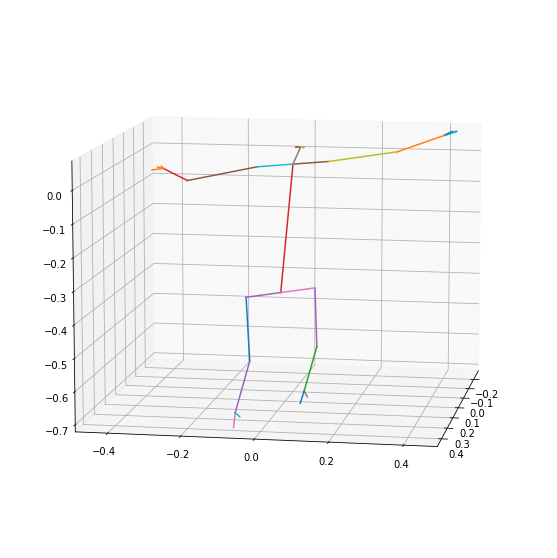

In [9]:
draw_frame(landmarks, 60)

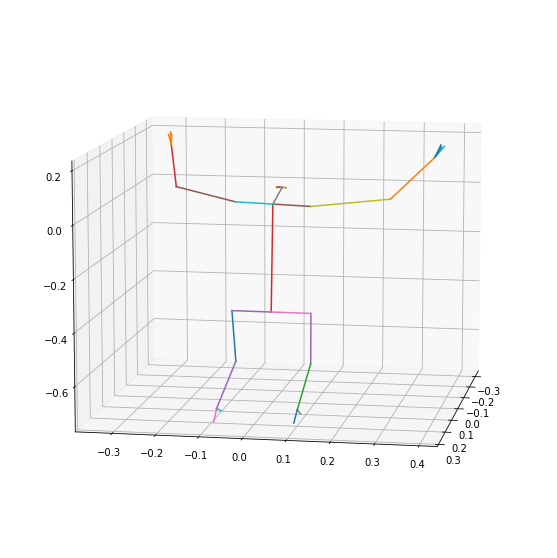

In [10]:
draw_frame(landmarks, -1)